<h1 align="center"> Python Essentials: Data Visualization.</h1>

    <Name> Sam Carpenter
    <Class> Section 3
    <Date> 11/28/20

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy import special

In [3]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

mean in x = 9.0
mean in y = 7.500909090909093
variance in x = 10.0
variance in y = 3.7520628099173554
slope = 0.5000909090909091
intercept = 3.0000909090909103
correlation coefficent = 0.8164205163448399


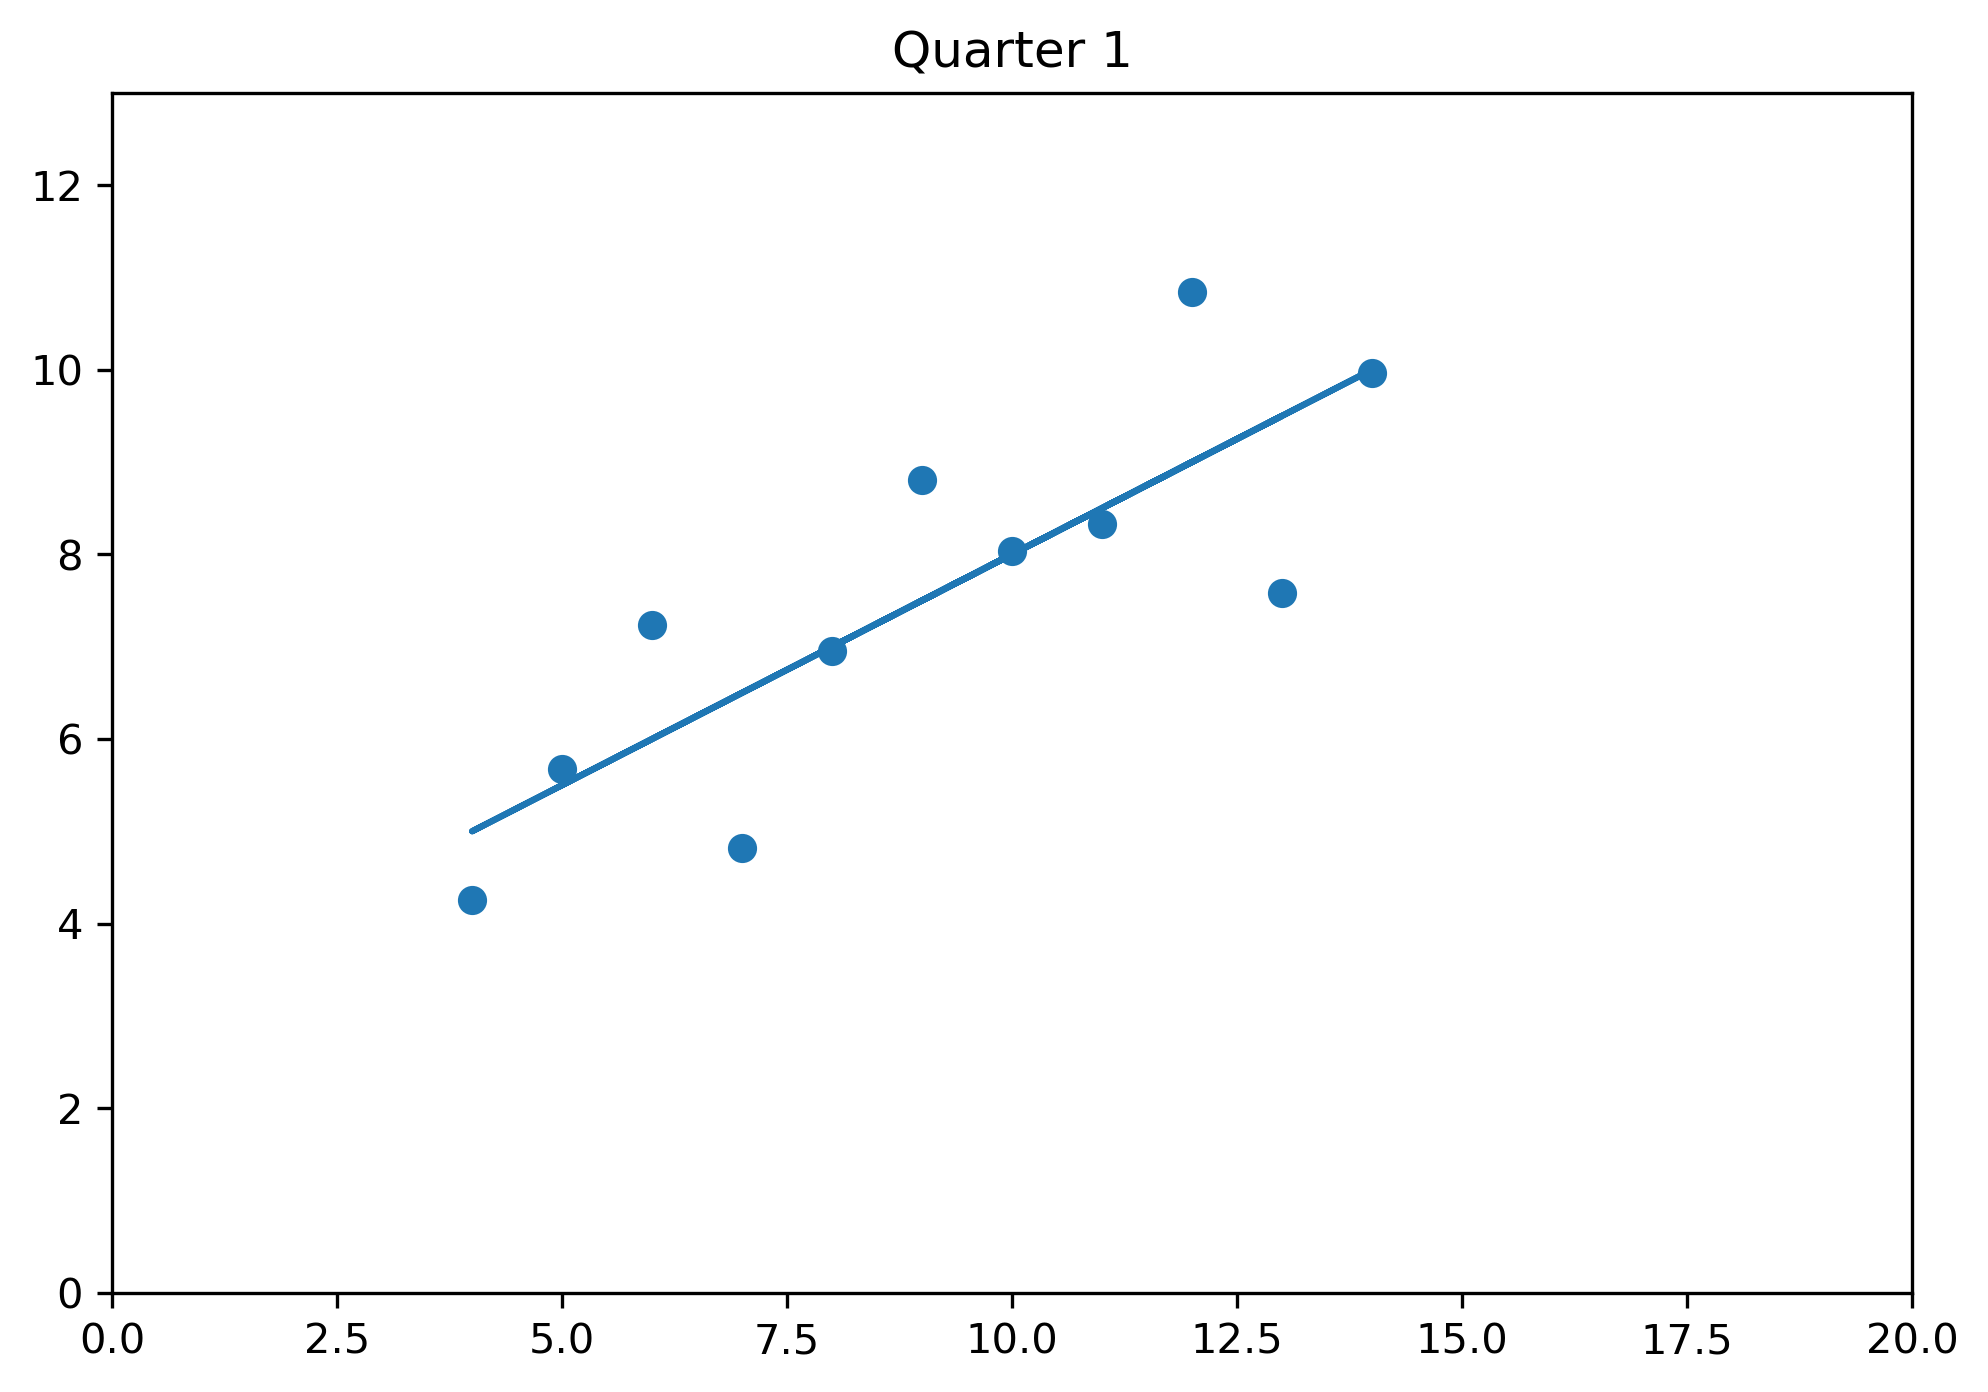

mean in x = 9.0
mean in y = 7.50090909090909
variance in x = 10.0
variance in y = 3.752390082644628
slope = 0.5000000000000001
intercept = 3.000909090909089
correlation coefficent = 0.816236506000243


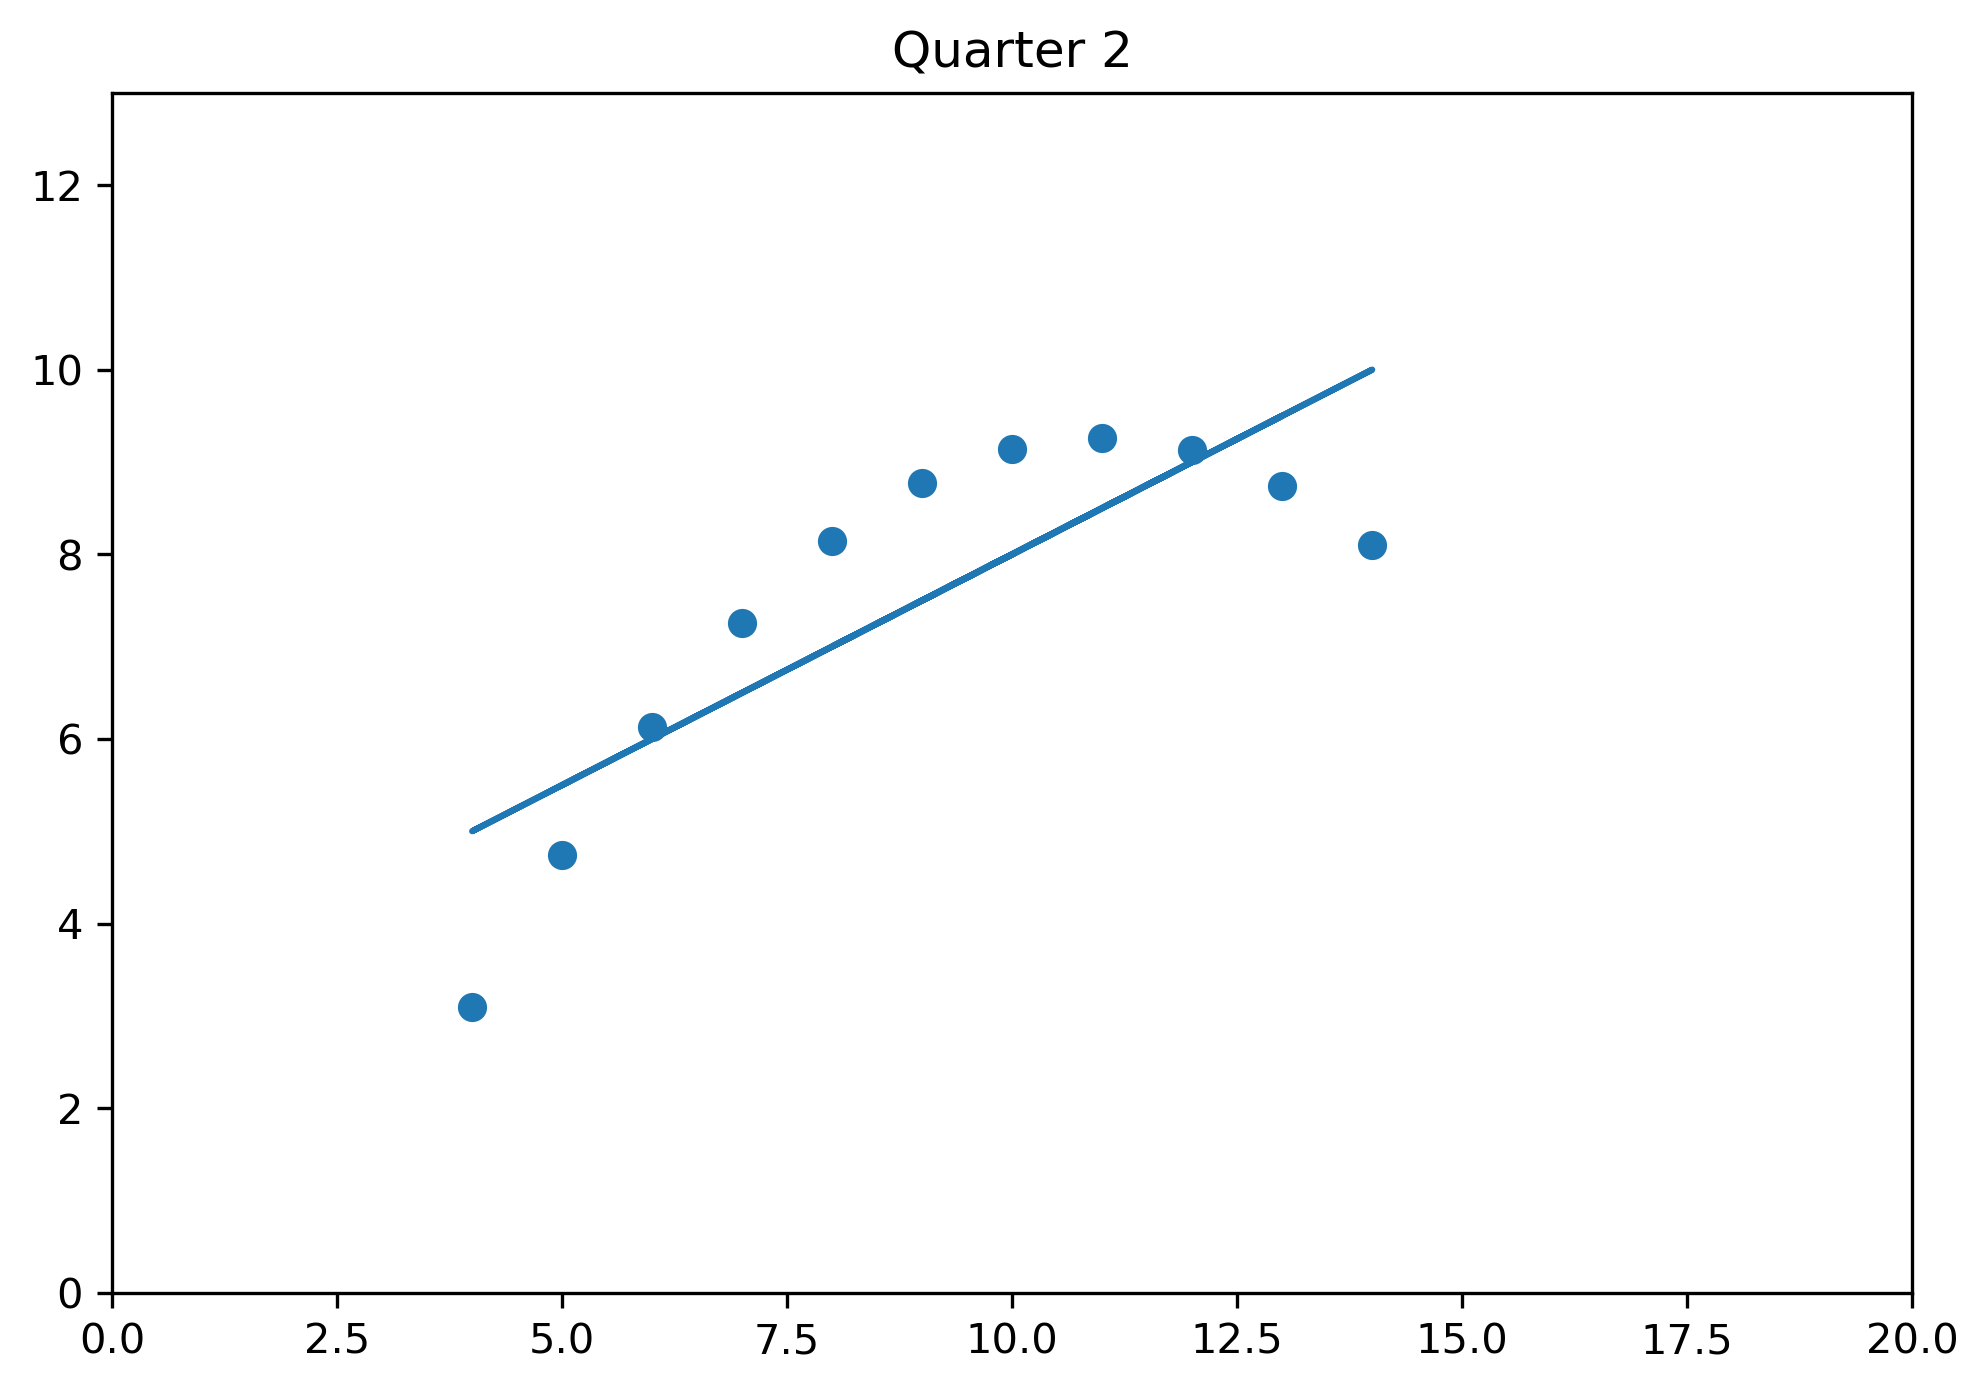

mean in x = 9.0
mean in y = 7.5
variance in x = 10.0
variance in y = 3.747836363636364
slope = 0.4997272727272729
intercept = 3.002454545454544
correlation coefficent = 0.8162867394895984


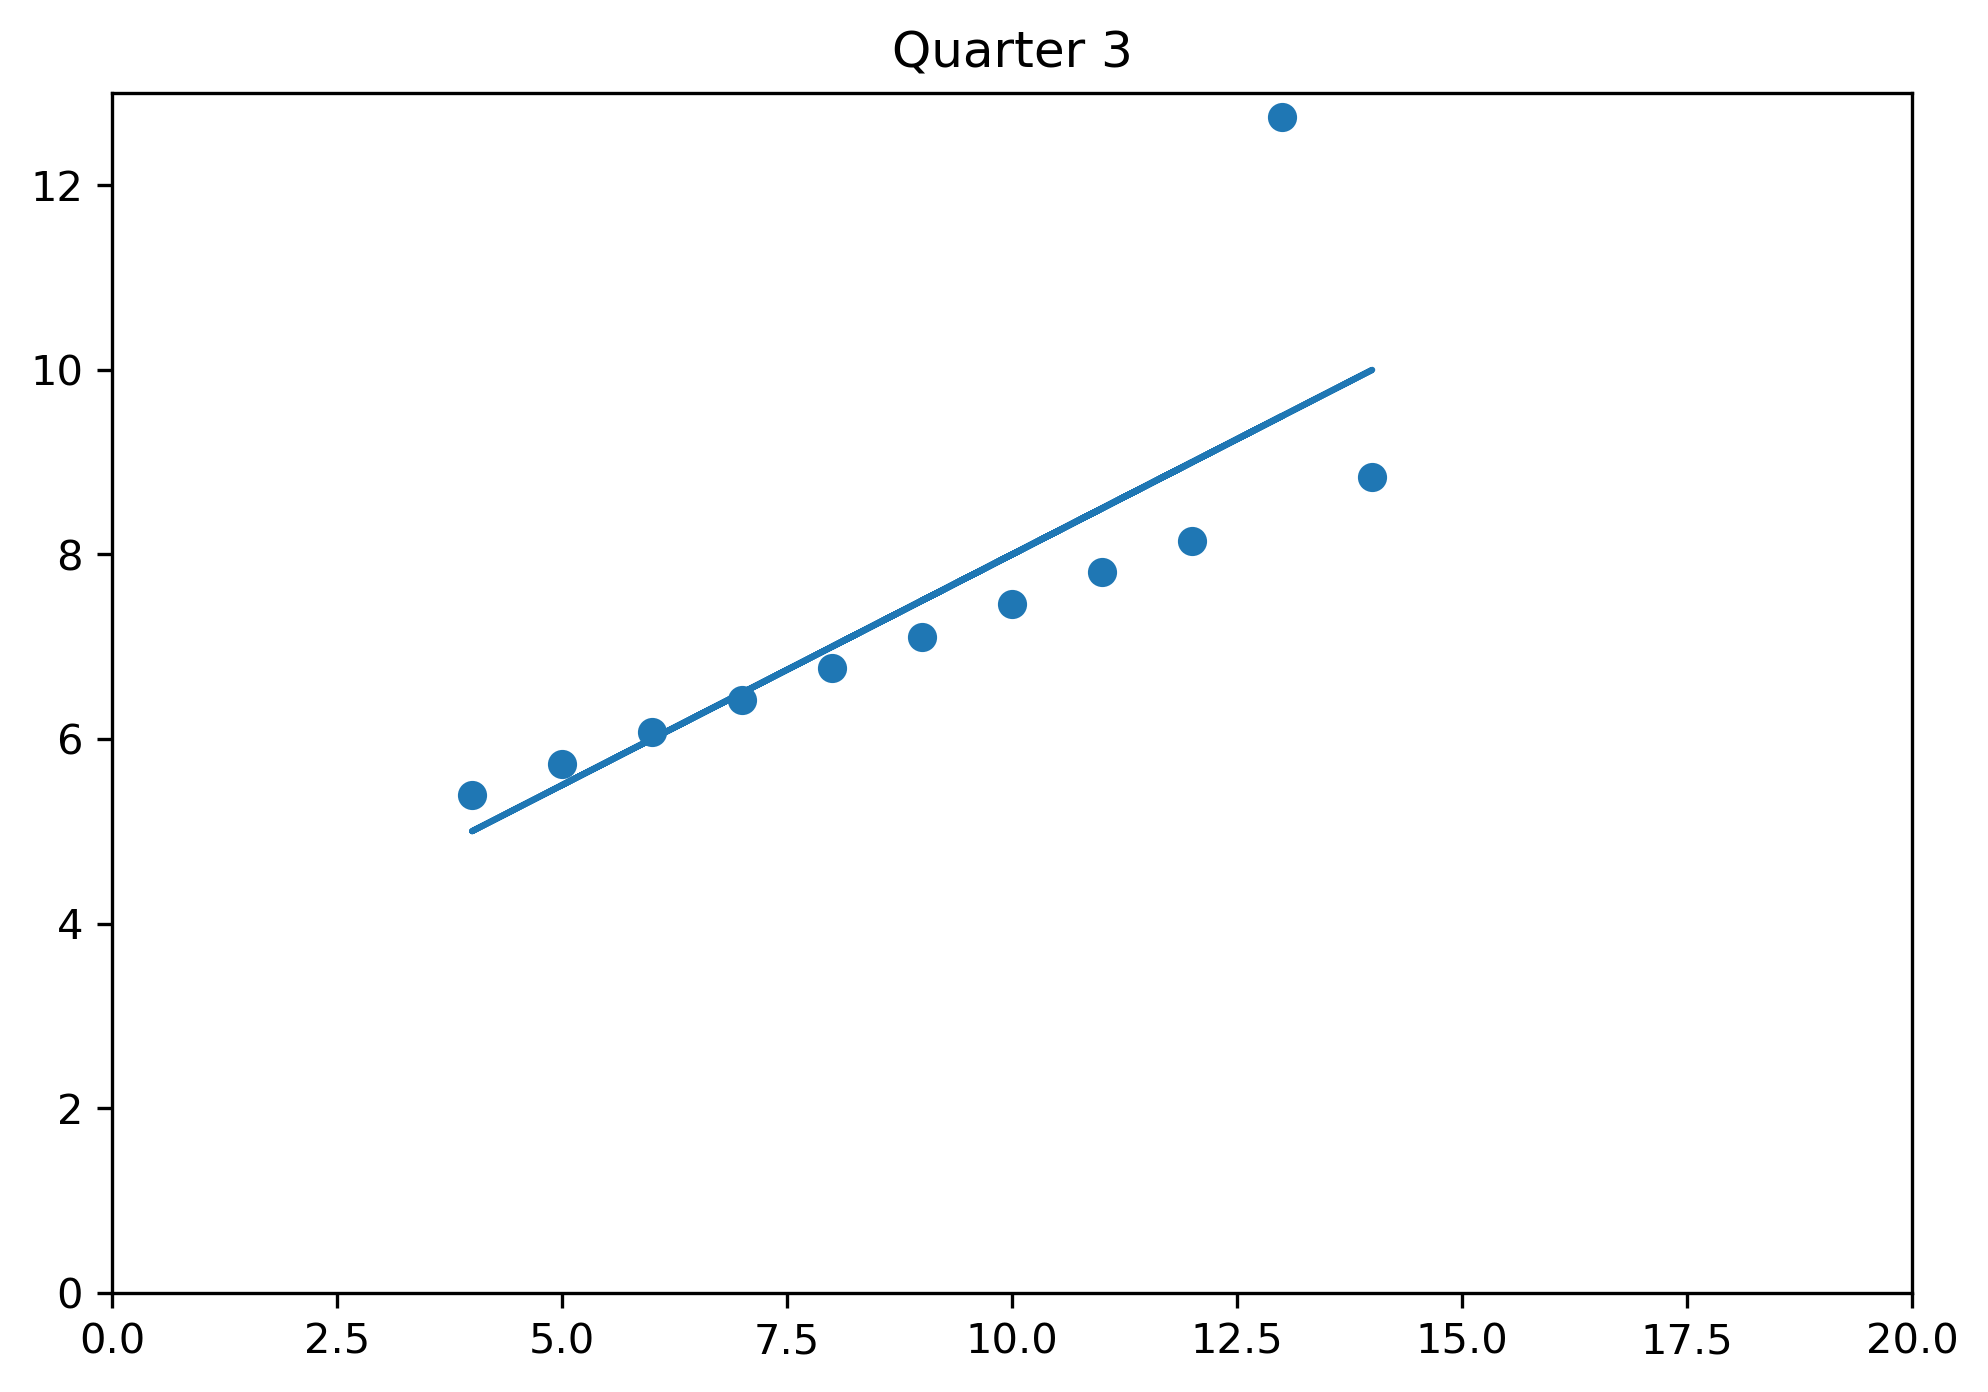

mean in x = 9.0
mean in y = 7.500909090909091
variance in x = 10.0
variance in y = 3.7484082644628103
slope = 0.4999090909090909
intercept = 3.0017272727272726
correlation coefficent = 0.8165214368885028


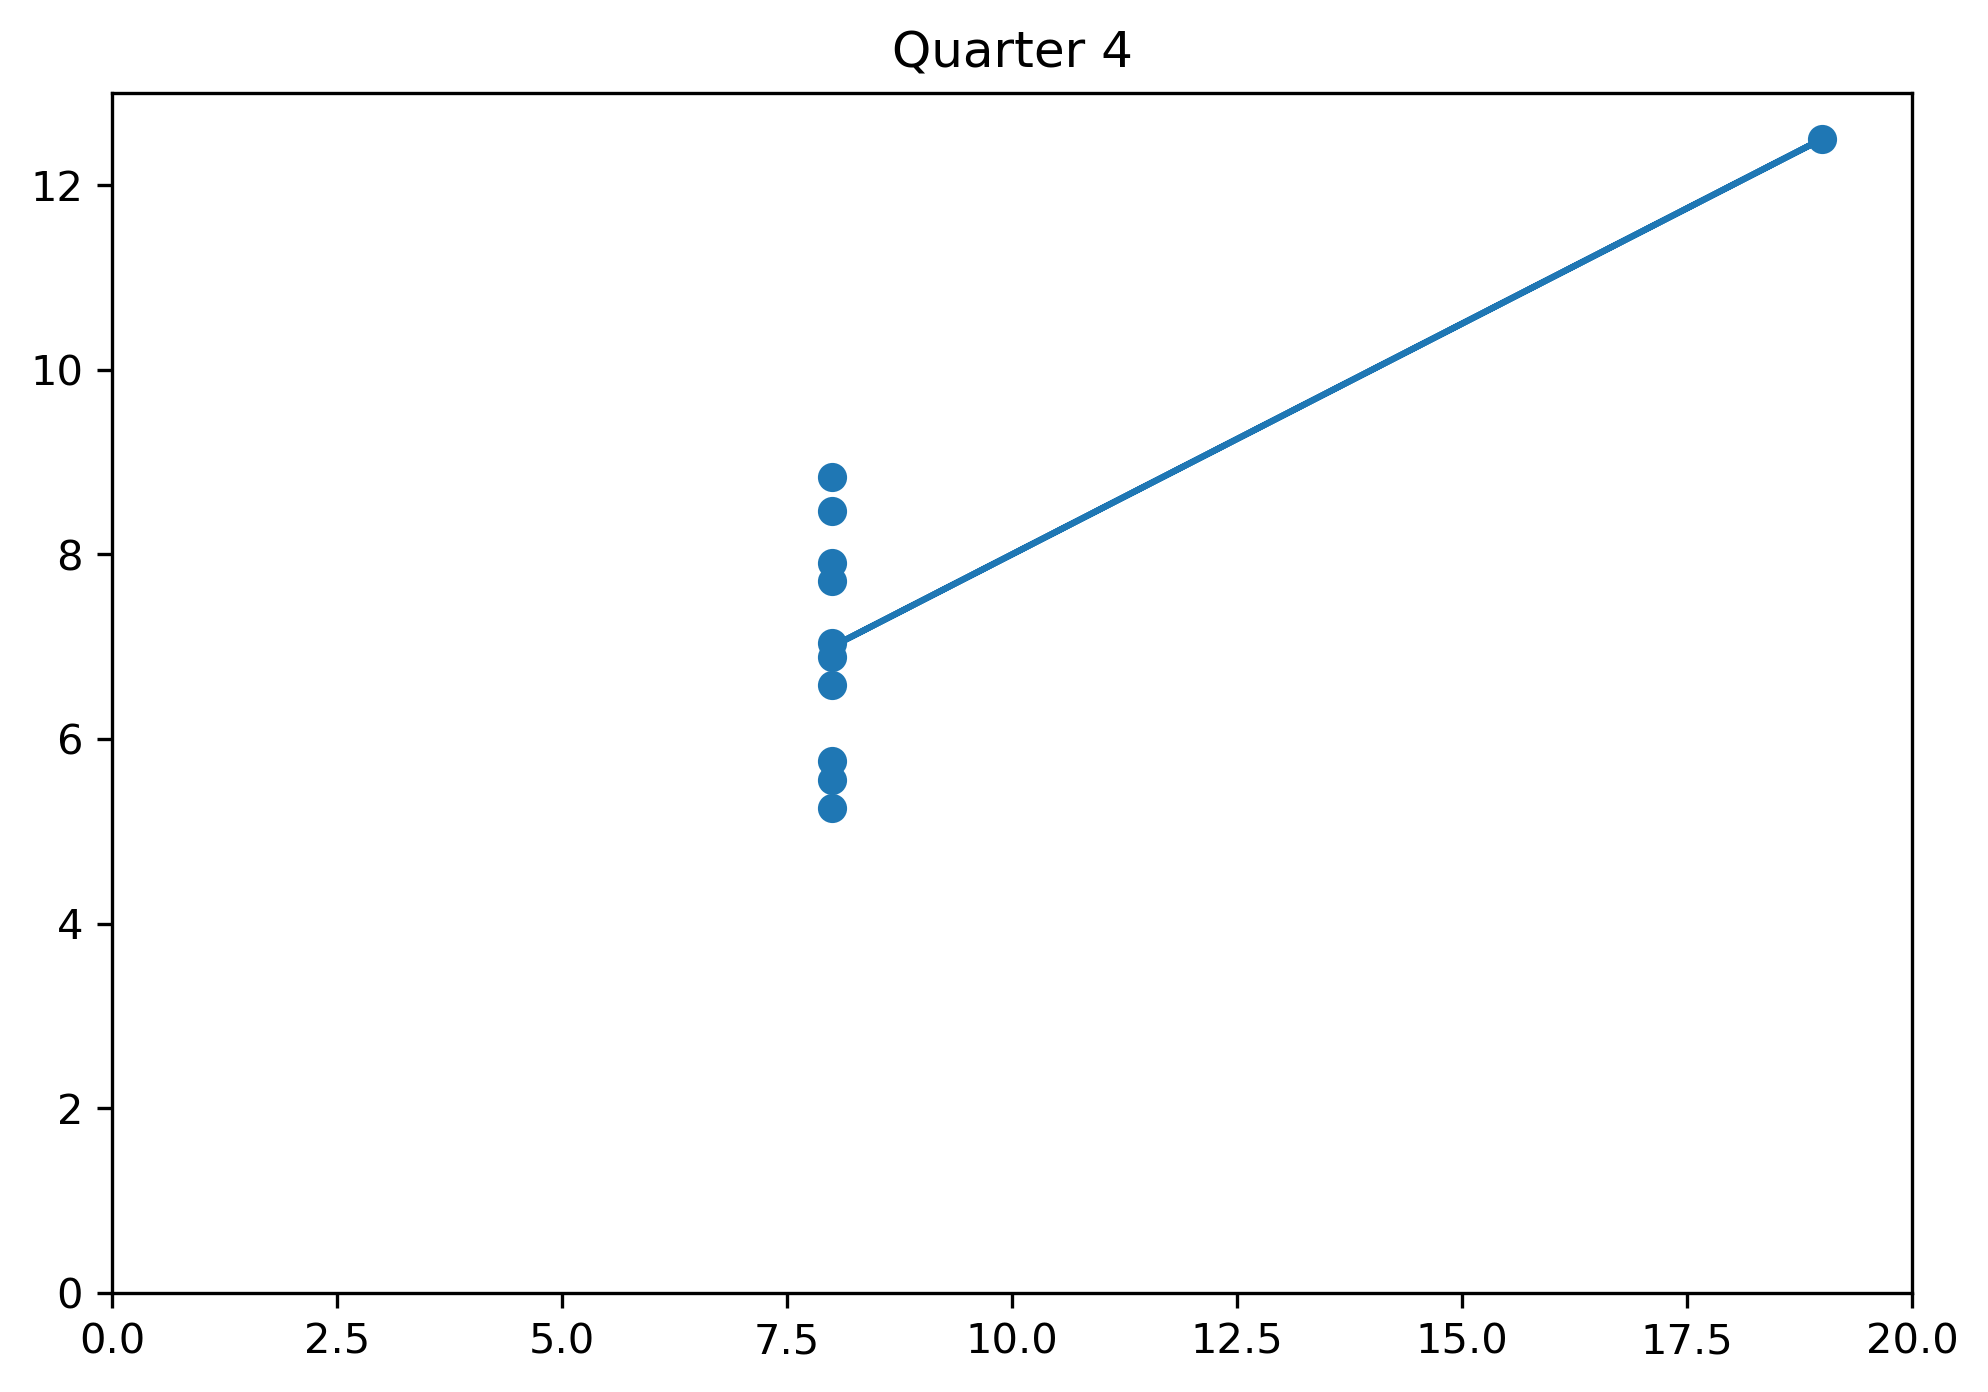

Quarter 1 is a good candidate for a linear regression because the scatter points somewhat correlate with a line as shown in the graph.
Quarter 2 looks like a quadratic or something like that so it is not the best candidate for a linear regression.
Quarter 3 is almost perfectly a linear regression except for one point. That point throws off the linear regression a bit but the line is mostly accurate. However, as time progresses, the line will get less and less accurate by a linear rate.
Quarter 4 has a terrible linear regression. It should plot a vertical line if possible but one point throws off the linear regression in a way that doesn't accurately reflect the data given.


In [22]:
A = np.load("anscombe.npy")
for i in range(4):    
    xCoords = A[:, 2 * i]
    yCoords = A[:, 2 * i + 1]
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.scatter(xCoords, yCoords)
    plt.title("Quarter " + str(i + 1))
    plt.xlim(0, 20)
    plt.ylim(0, 13)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(xCoords, yCoords)
    plt.plot(xCoords, intercept + slope * xCoords)
    
    xMean = np.mean(xCoords)
    yMean = np.mean(yCoords)
    xVar = np.var(xCoords)
    yVar = np.var(yCoords)
    
    print("mean in x = " + str(xMean))
    print("mean in y = " + str(yMean))
    print("variance in x = " + str(xVar))
    print("variance in y = " + str(yVar))
    print("slope = " + str(slope))
    print("intercept = " + str(intercept))
    print("correlation coefficent = " + str(r_value))
    plt.show()
    
print("Quarter 1 is a good candidate for a linear regression because the scatter points somewhat correlate with a line as shown in the graph.\nQuarter 2 looks like a quadratic or something like that so it is not the best candidate for a linear regression.\nQuarter 3 is almost perfectly a linear regression except for one point. That point throws off the linear regression a bit but the line is mostly accurate. However, as time progresses, the line will get less and less accurate by a linear rate.\nQuarter 4 has a terrible linear regression. It should plot a vertical line if possible but one point throws off the linear regression in a way that doesn't accurately reflect the data given.")

### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.misc.comb()`.)

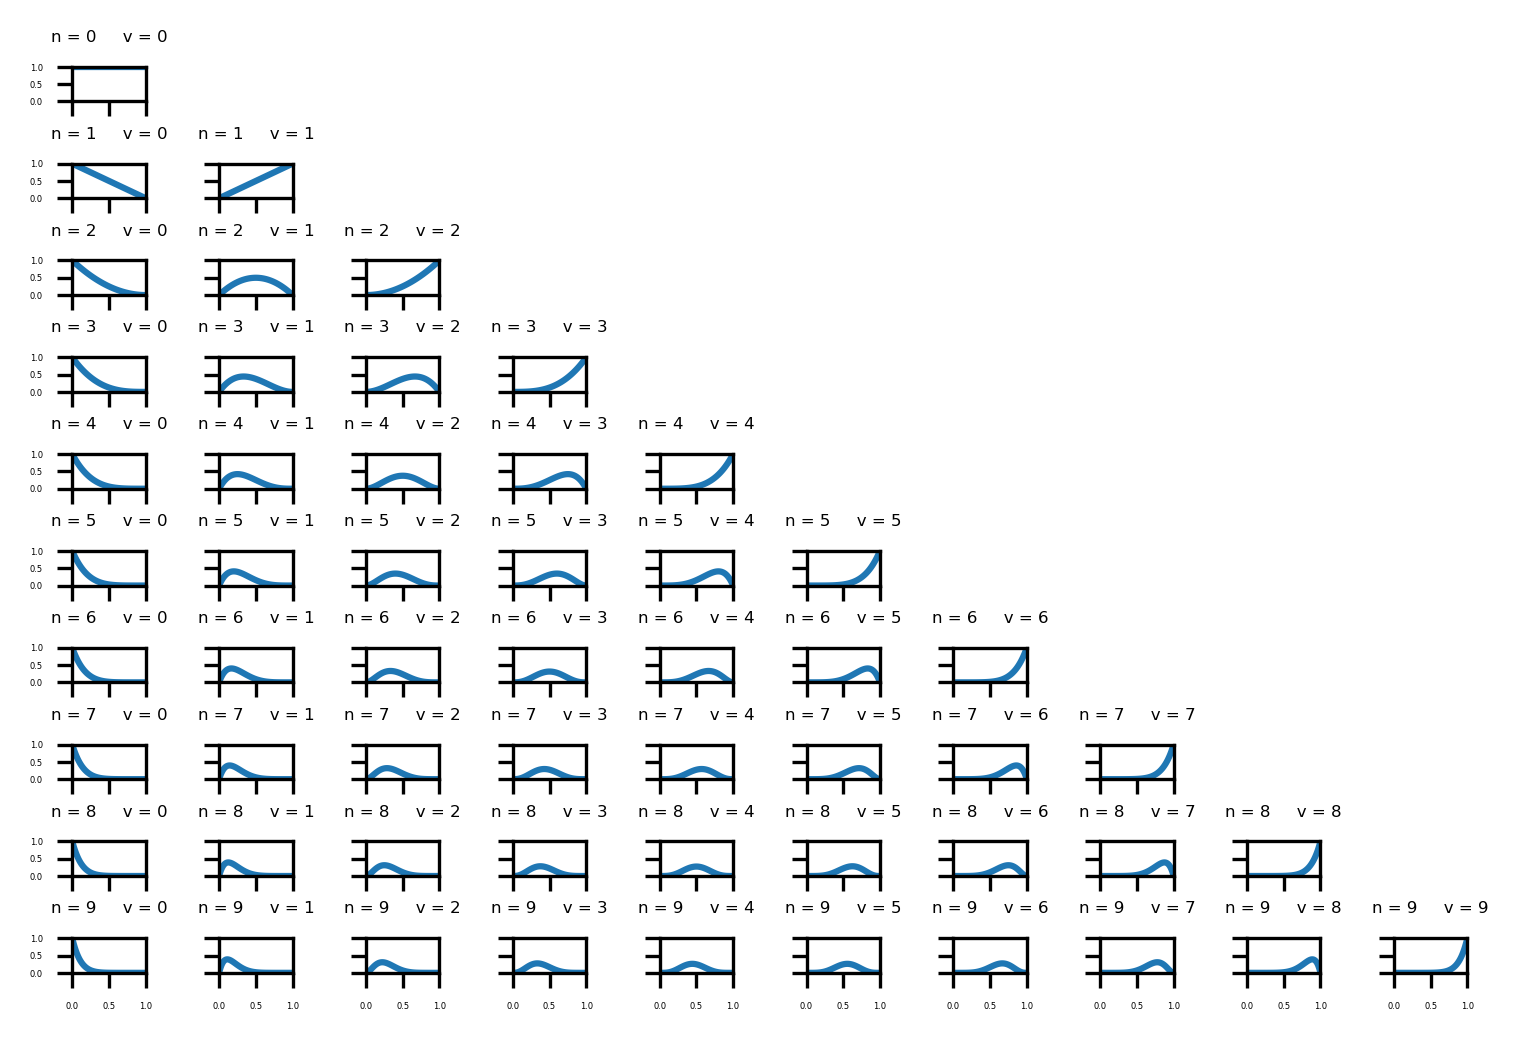

In [80]:
fig, axs = plt.subplots(10, 10)
x = np.linspace(0, 1, 100)

def bernstein(n, v, x):
    return special.binom(n, v) * (x ** v) * (1- x) ** (n - v)

for n in range(10):
    for v in range(n + 1):
        currAxis = axs[n, v]
        currAxis.set_title("n = " + str(n) + "     v = " + str(v), fontsize = 4)
        currAxis.plot(x, bernstein(n, v, x))
        currAxis.tick_params(axis='x', labelsize=2)
        currAxis.tick_params(axis='y', labelsize=2)
        currAxis.autoscale(False)
        
#Turn off all irrelevant axes (wherever v > n)
for row in range(9):
    for col in range(row + 1, 10):
        currAxis = axs[row, col]
        currAxis.axis("off")

#Only let the outer scale labels show
for ax in axs.flat:
    ax.label_outer()

plt.subplots_adjust(wspace=1, hspace=1.8)
plt.show()


### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

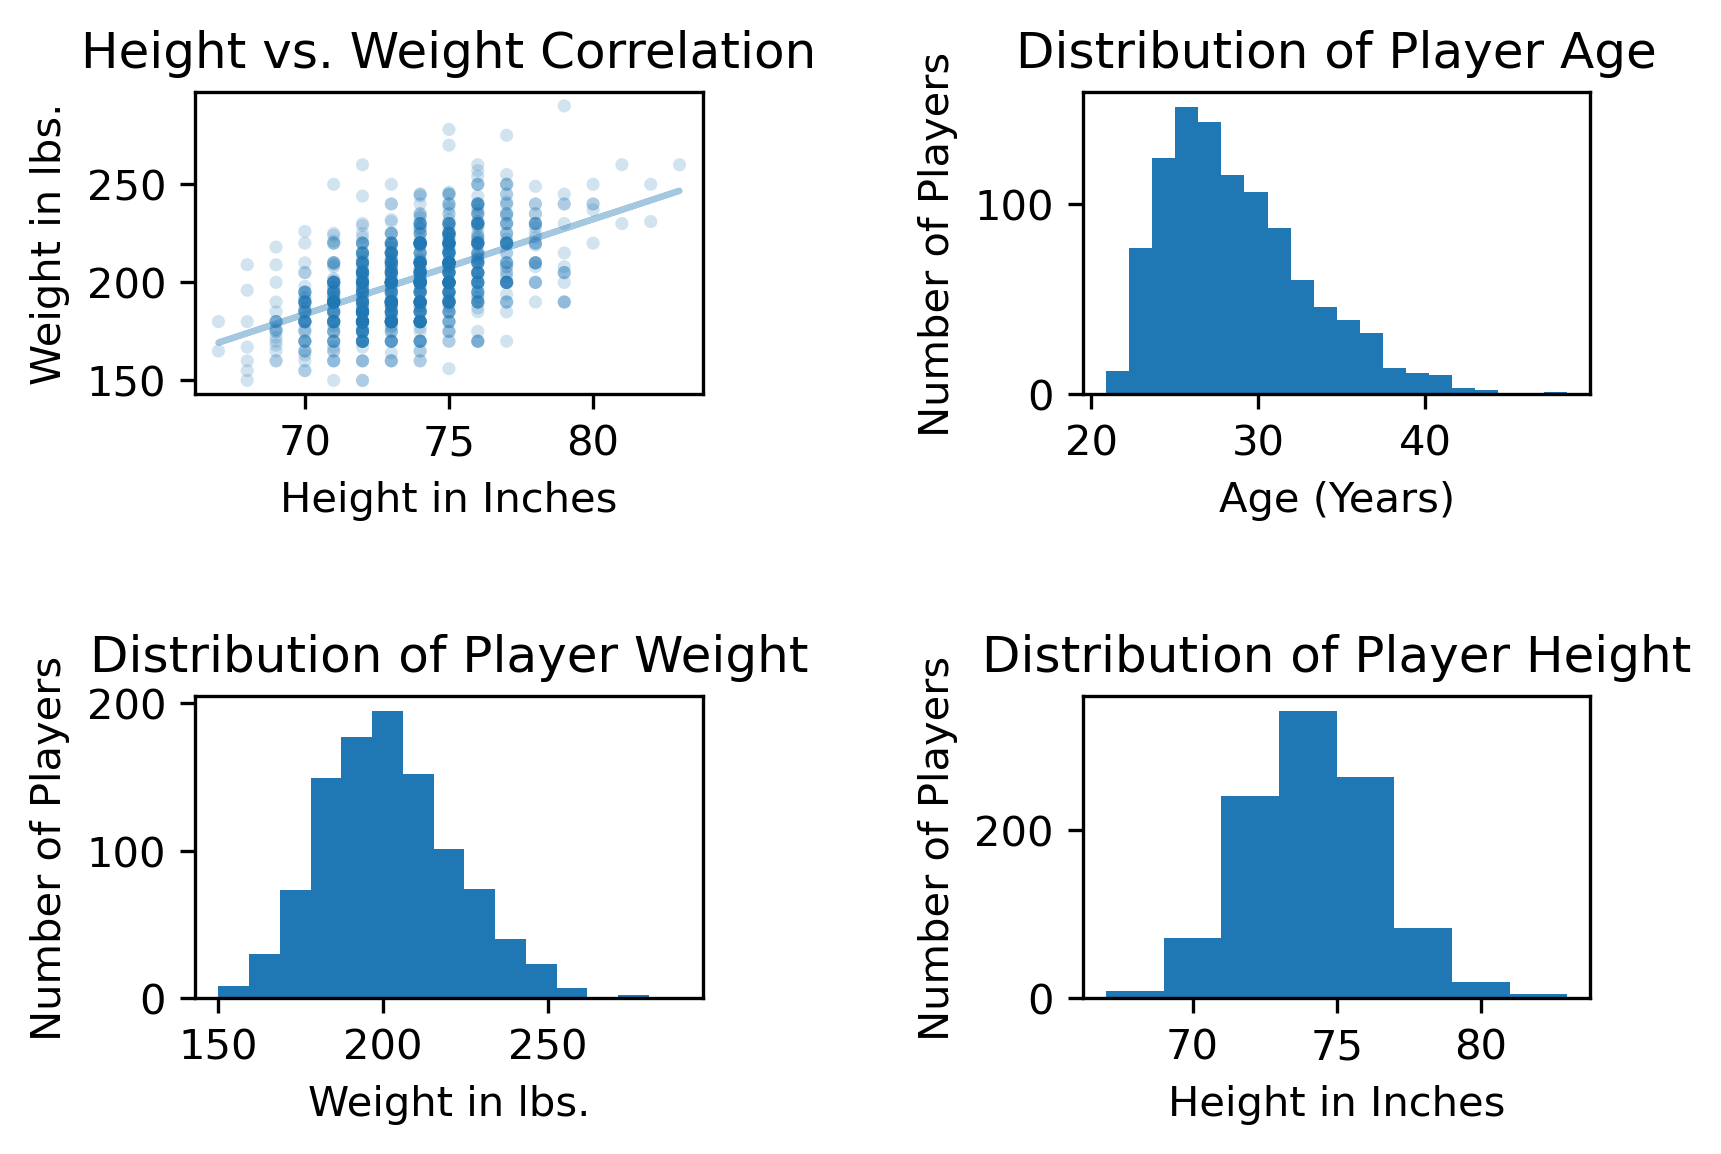

In [114]:
height, weight, age = np.load("MLB.npy").T

fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(height, weight, alpha=0.2, edgecolor='none', s=10)
axs[0, 0].set(xlabel='Height in Inches', ylabel='Weight in lbs.')
axs[0, 0].set_title('Height vs. Weight Correlation')
slope, intercept, r_value, p_value, std_err = stats.linregress(height, weight)
axs[0, 0].plot(height, intercept + slope * height, alpha=0.4)

axs[0, 1].hist(age, bins=20)
axs[0, 1].set(xlabel='Age (Years)', ylabel='Number of Players')
axs[0, 1].set_title('Distribution of Player Age')

axs[1, 0].hist(weight, bins=15)
axs[1, 0].set(xlabel='Weight in lbs.', ylabel='Number of Players')
axs[1, 0].set_title('Distribution of Player Weight')

axs[1, 1].hist(height, bins=8)
axs[1, 1].set(xlabel='Height in Inches', ylabel='Number of Players')
axs[1, 1].set_title('Distribution of Player Height')

plt.subplots_adjust(wspace=0.75, hspace=1)
plt.show()

### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with two or three visualizations, including line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

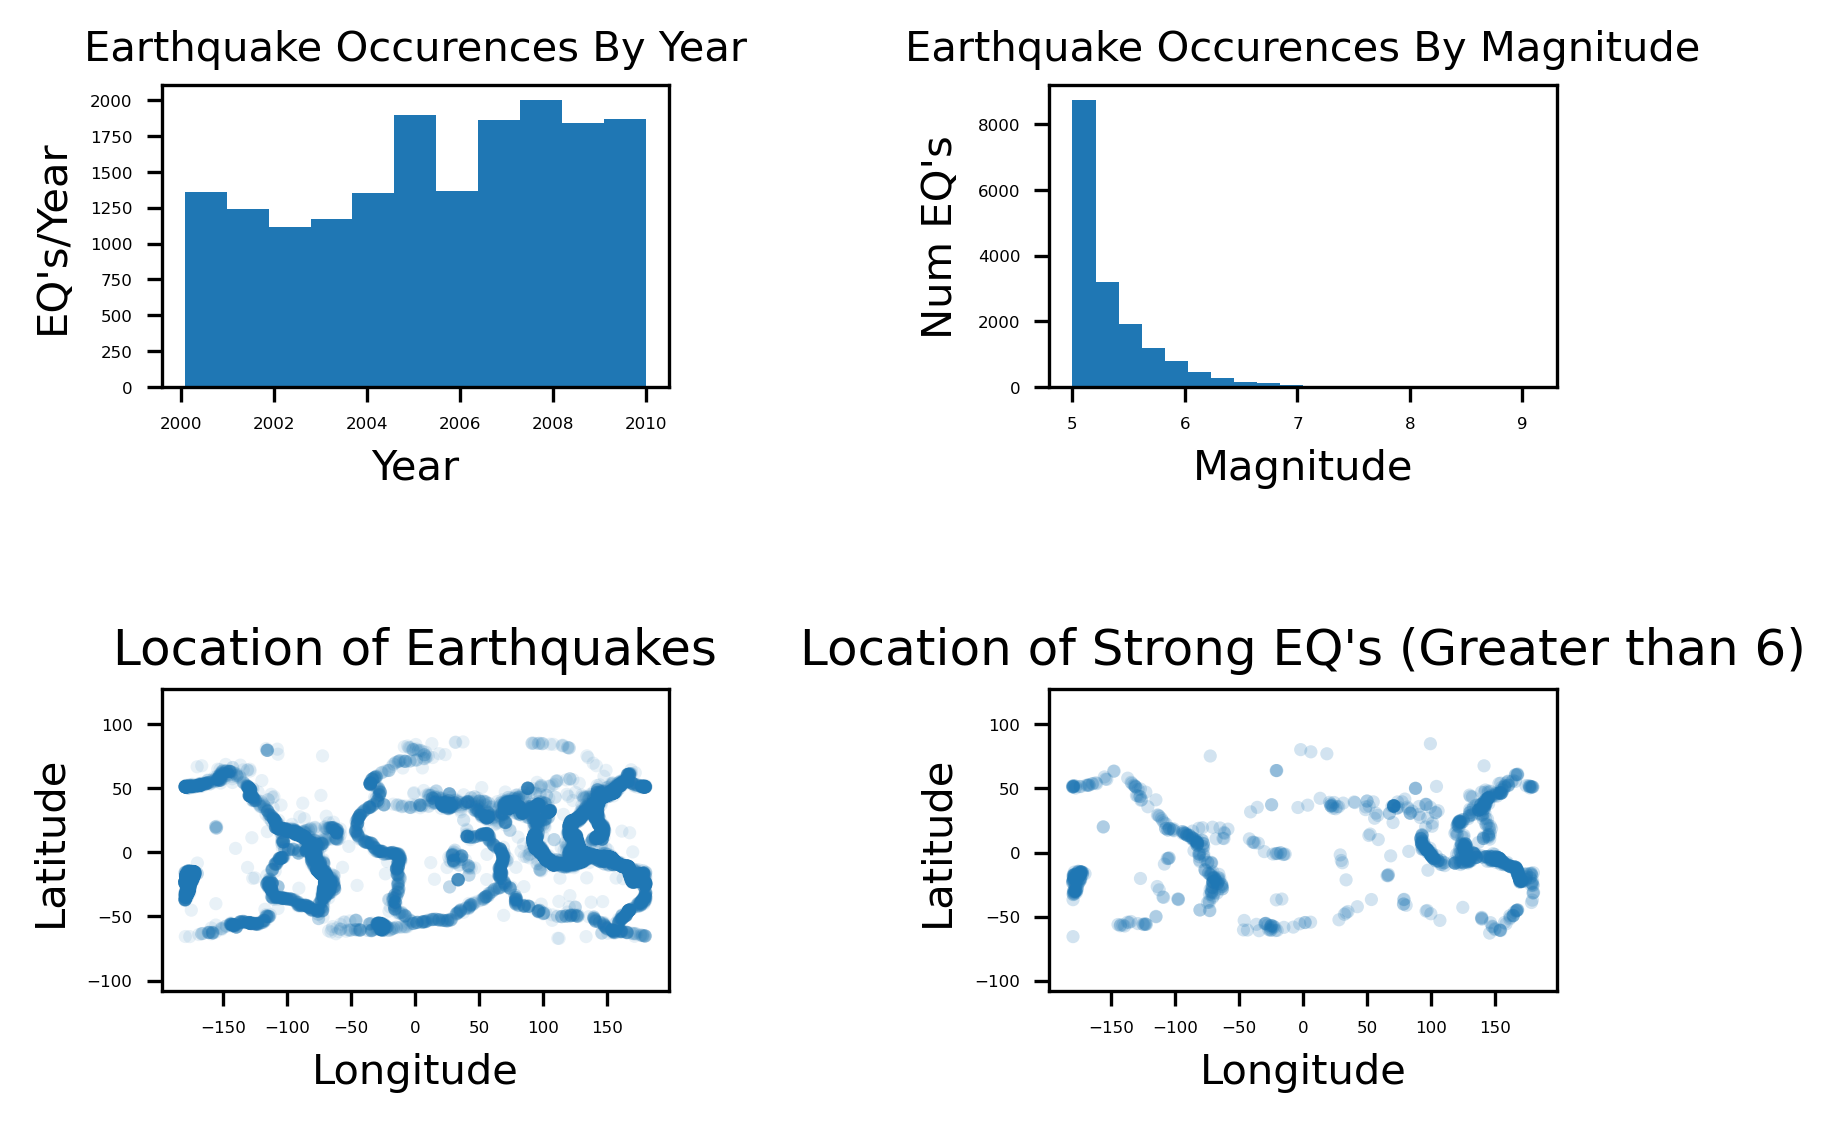

In [165]:
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T

fig, axs = plt.subplots(2, 2)

axs[0,0].hist(years, bins=11)
axs[0,0].set(xlabel='Year', ylabel='EQ\'s/Year')
axs[0,0].set_title('Earthquake Occurences By Year', fontsize=10)
axs[0,0].tick_params(axis='x', labelsize=4)
axs[0,0].tick_params(axis='y', labelsize=4)

axs[0,1].hist(magnitudes, bins=20)
axs[0,1].set(xlabel='Magnitude', ylabel='Num EQ\'s')
axs[0,1].set_title('Earthquake Occurences By Magnitude', fontsize=10)
axs[0,1].tick_params(axis='x', labelsize=4)
axs[0,1].tick_params(axis='y', labelsize=4)

axs[1,0].scatter(longitude, latitude, alpha=0.1, edgecolor='none', s=10)
axs[1,0].set(xlabel='Longitude', ylabel='Latitude')
axs[1,0].set_title('Location of Earthquakes')
axs[1,0].tick_params(axis='x', labelsize=4)
axs[1,0].tick_params(axis='y', labelsize=4)
axs[1,0].axis("equal")

strongLongitude = [longitude[i] for i in range(len(longitude)) if magnitudes[i] > 6]
strongLatitude = [latitude[i] for i in range(len(latitude)) if magnitudes[i] > 6]

axs[1,1].scatter(strongLongitude, strongLatitude, alpha=0.2, edgecolor='none', s=10)
axs[1,1].set(xlabel='Longitude', ylabel='Latitude')
axs[1,1].set_title('Location of Strong EQ\'s (Greater than 6)')
axs[1,1].tick_params(axis='x', labelsize=4)
axs[1,1].tick_params(axis='y', labelsize=4)
axs[1,1].axis("equal")

plt.subplots_adjust(wspace=0.75, hspace=1)
plt.show()

### Problem 5

The _Rosenbrock function_ is defined as follows. $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

<ipython-input-183-f5b686429a92>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(X, Y, Z, cmap="viridis") # Heat map.
<ipython-input-183-f5b686429a92>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax1 = ax[0].pcolormesh(X, Y, Z, cmap="viridis")


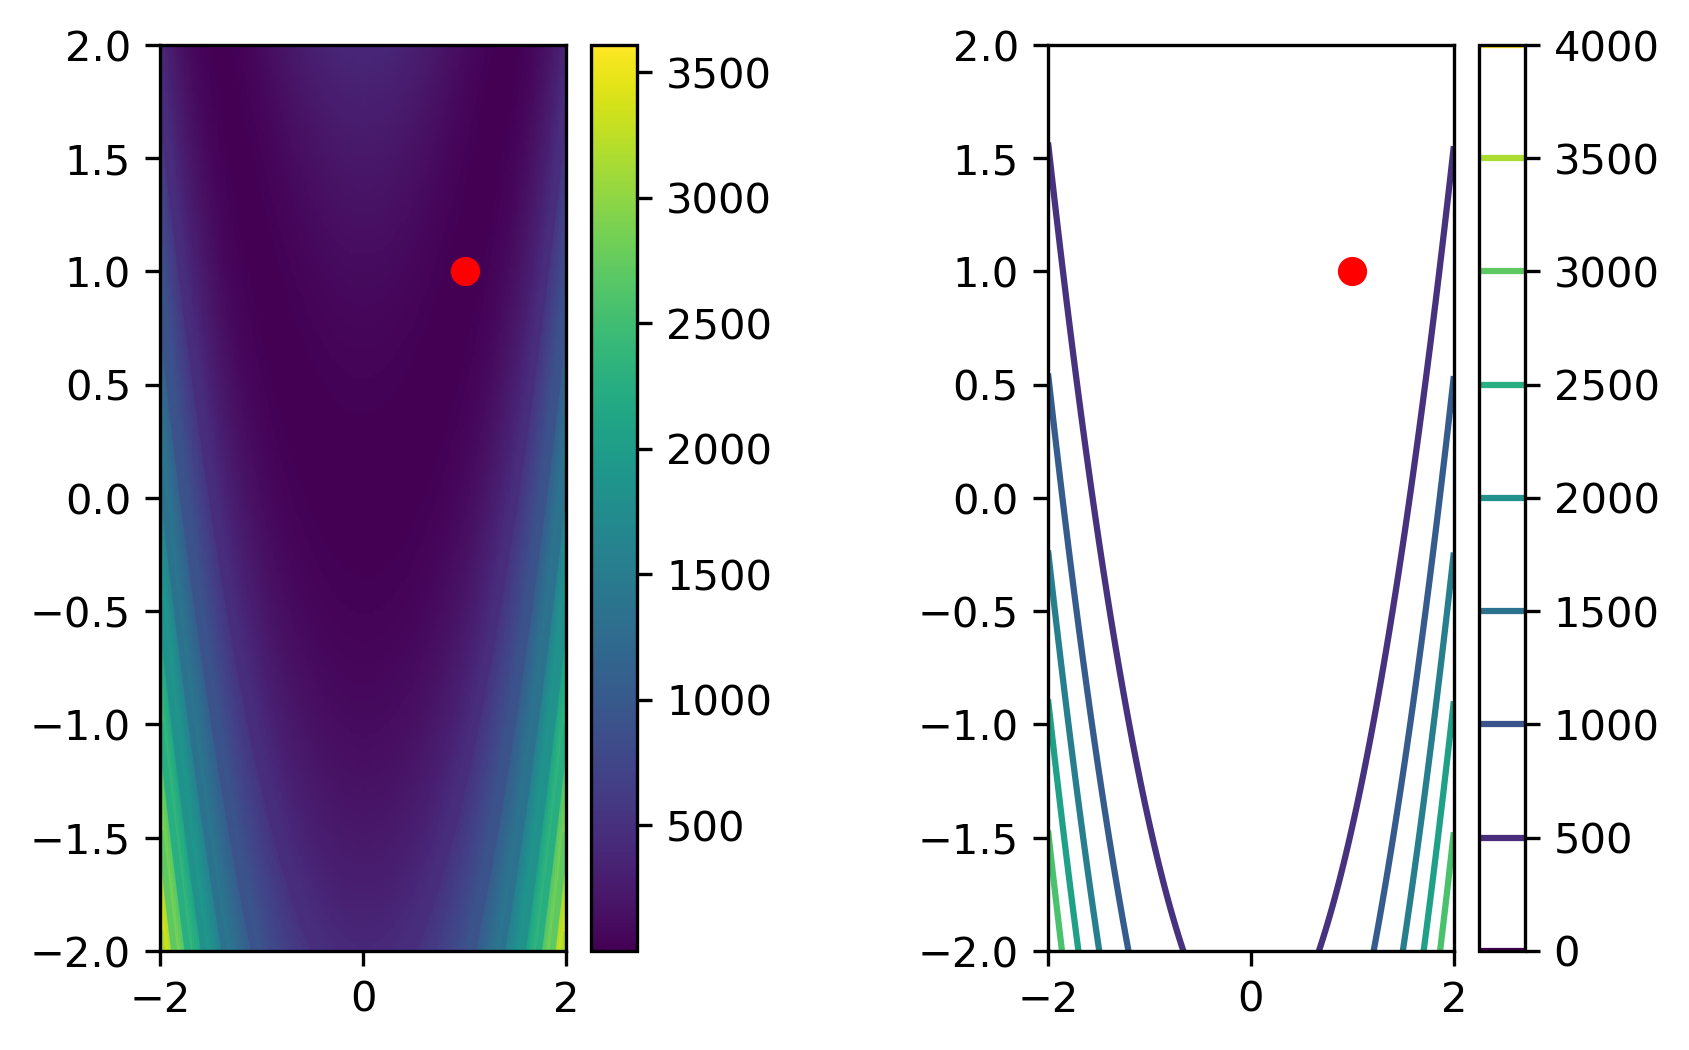

In [183]:
def rosenbrock(x,y):
    return (1 - x)**2 + 100 * (y-x**2)**2

x = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, x)
Z = rosenbrock(X,Y)

fig, ax = plt.subplots(1,2)
ax[0].pcolormesh(X, Y, Z, cmap="viridis") # Heat map.
ax[0].plot(1,1,'ro')

ax[1].contour(X, Y, Z, 6, cmap="viridis") # Contour map.
ax[1].plot(1,1,'ro')

cax1 = ax[0].pcolormesh(X, Y, Z, cmap="viridis")
fig.colorbar(cax1, ax=ax[0])

cax2 = ax[0].contour(X, Y, Z, cmap="viridis")
fig.colorbar(cax2, ax=ax[1])

plt.subplots_adjust(wspace=0.75, hspace=1)
plt.show()

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

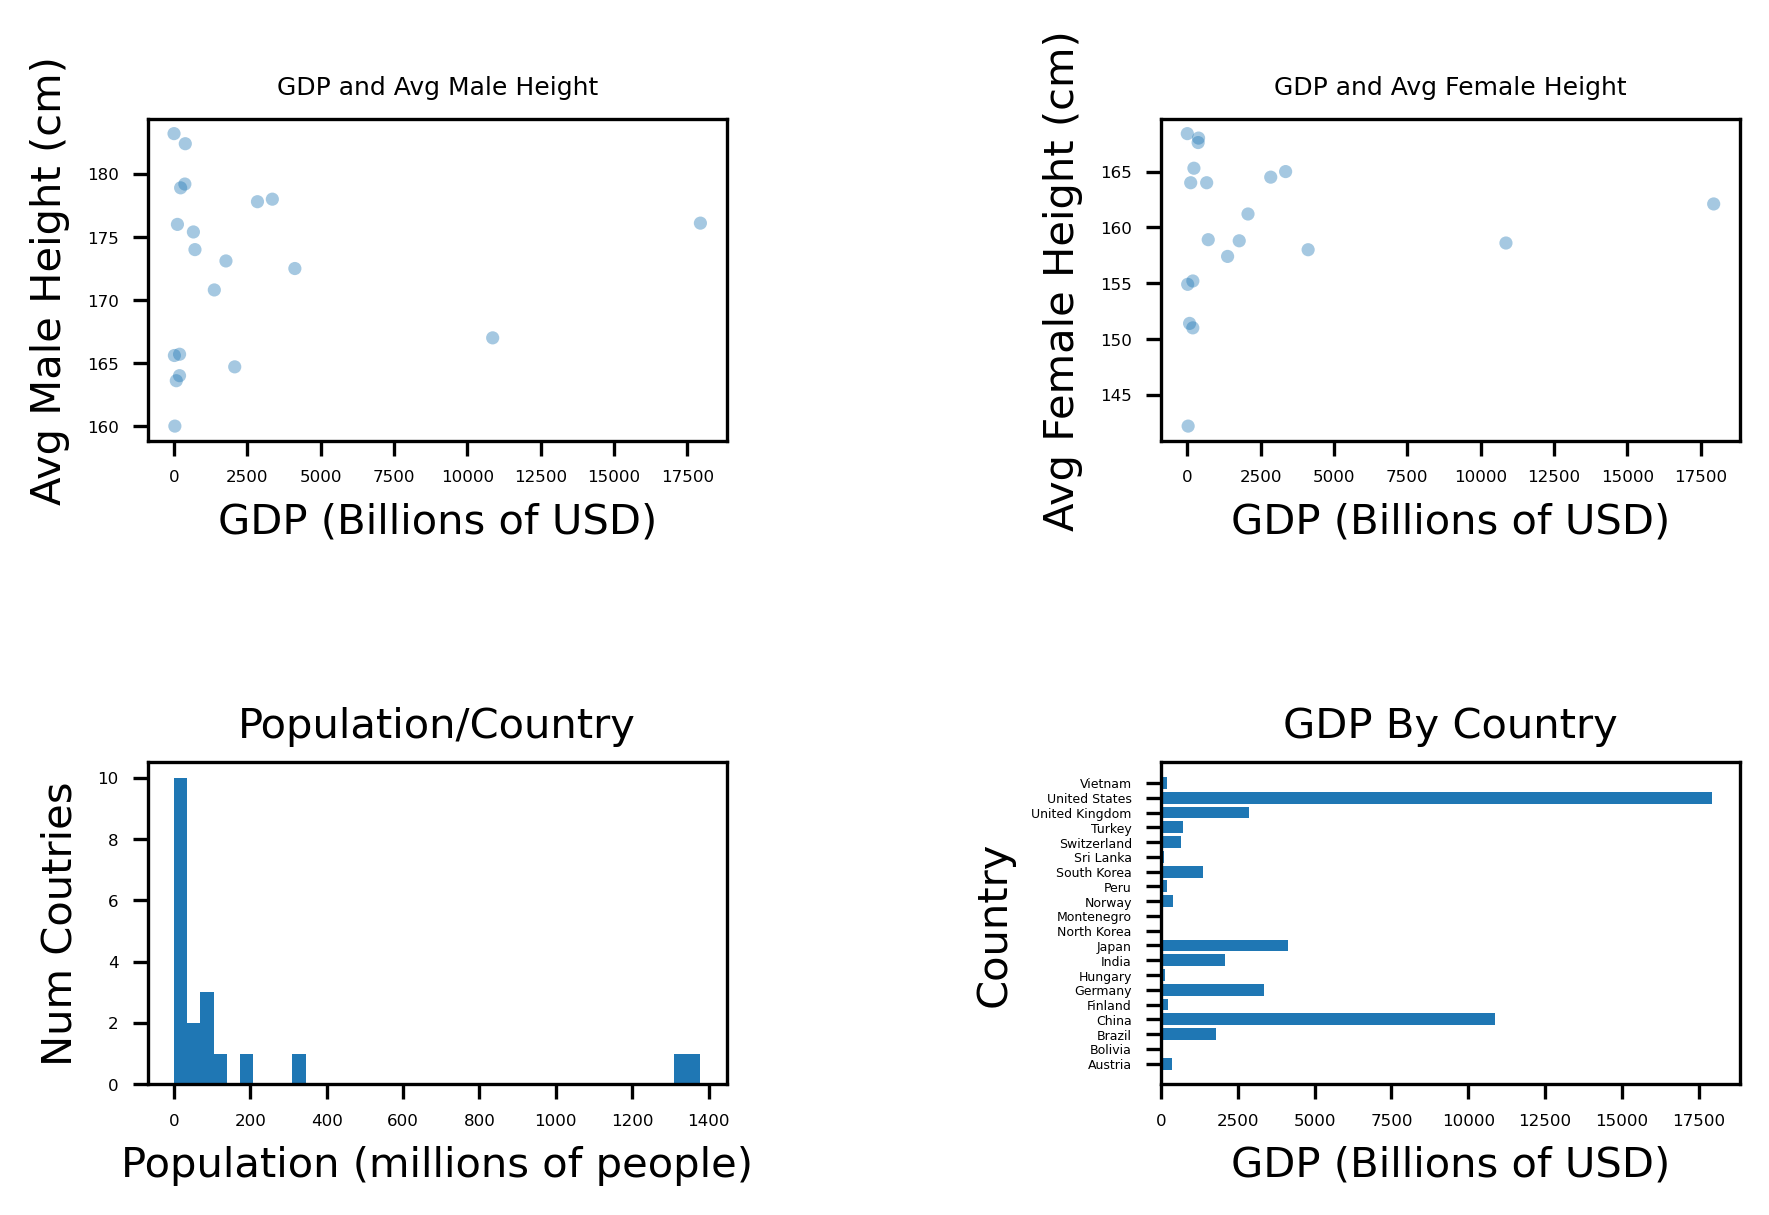

I thought maybe there would be a correlation with GDP and height. There is clearly none.
Most of the countries are clustered around a few million people, but a couple countries (most likely China and India) have significantly more people than the rest of the world.
USA and China are pretty rich. North Korea is not.


In [226]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T

fig, axs = plt.subplots(2, 2)

#Scatter plot
axs[0,0].scatter(gdp, male, alpha=0.4, edgecolor='none', s=10)
axs[0,0].set(xlabel='GDP (Billions of USD)', ylabel='Avg Male Height (cm)')
axs[0,0].set_title('GDP and Avg Male Height', fontsize = 6)
axs[0,0].tick_params(axis='x', labelsize=4)
axs[0,0].tick_params(axis='y', labelsize=4)

#Scatter plot
axs[0,1].scatter(gdp, female, alpha=0.4, edgecolor='none', s=10)
axs[0,1].set(xlabel='GDP (Billions of USD)', ylabel='Avg Female Height (cm)')
axs[0,1].set_title('GDP and Avg Female Height', fontsize = 6)
axs[0,1].tick_params(axis='x', labelsize=4)
axs[0,1].tick_params(axis='y', labelsize=4)

#Histogram
axs[1,0].hist(population, bins=40)
axs[1,0].set(xlabel='Population (millions of people)', ylabel='Num Coutries')
axs[1,0].set_title('Population/Country', fontsize=10)
axs[1,0].tick_params(axis='x', labelsize=4)
axs[1,0].tick_params(axis='y', labelsize=4)

#Bar Chart
positions = np.arange(len(countries))
axs[1,1].set_title('GDP By Country', fontsize = 10)
axs[1,1].barh(positions, gdp, align="center")
plt.yticks(positions, countries)
plt.tight_layout()
axs[1,1].set(xlabel='GDP (Billions of USD)', ylabel='Country')
axs[1,1].tick_params(axis='y', labelsize=3)
axs[1,1].tick_params(axis='x', labelsize=4)

plt.subplots_adjust(wspace=0.75, hspace=1)
plt.show()
print("I thought maybe there would be a correlation with GDP and height. There is clearly none.\nMost of the countries are clustered around a few million people, but a couple countries (most likely China and India) have significantly more people than the rest of the world.\nUSA and China are pretty rich. North Korea is not.")